# Variable Exploration V2
I'll explore variables present in datasets as well as any external data I can find

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import os, sys
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import AffinityPropagation

#Import other files
raw_path = os.path.join('..', 'data', 'raw')
proc_path = os.path.join('..', 'data', 'processed')
sys.path.append(os.path.join('..', 'src'))
from viz.Correl import *
from model.Scoring import *
%matplotlib inline  
%load_ext autoreload
%autoreload 2

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#Read in features data from V1
features = pd.read_csv(os.path.join(proc_path, 'team_features_2017.csv'))

# Section 1: Clustering Regular Season Performance
I'll try to create clusters for different styles of play

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


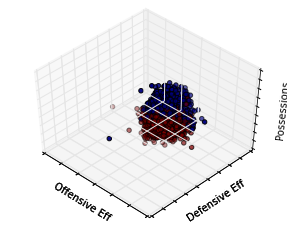

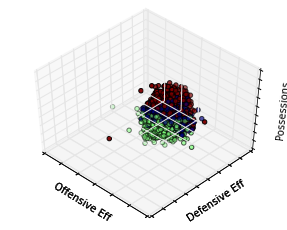

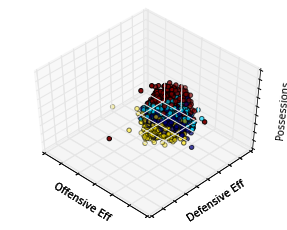

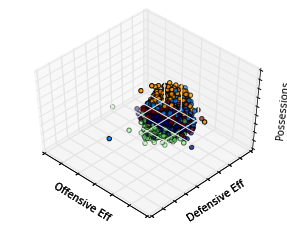

In [3]:
#Looks at clusters of ranging sizes for offensive efficiency, defensive efficiency, and total possessions

#finish this up, making color do nothing
X = features[['oeff', 'deff', 'total_poss']]

estimators = {'k_means_2': KMeans(n_clusters=2, random_state = 0),
              'k_means_3': KMeans(n_clusters=3, random_state = 0),
              'k_means_4': KMeans(n_clusters=4, random_state = 0),
              'k_means_5': KMeans(n_clusters=5, random_state = 0)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.ix[:, 0], X.ix[:, 1], X.ix[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Offensive Eff')
    ax.set_ylabel('Defensive Eff')
    ax.set_zlabel('Possessions')
    fignum = fignum + 1


In [4]:
#So arbitrarily, I'm going to use k-means clusters with 3 variables with 3 groups

X = features[['oeff', 'deff', 'total_poss']]
cluster_model = KMeans(n_clusters=3, random_state = 0).fit(X)

clusters = pd.get_dummies(cluster_model.labels_)

for col in clusters.columns.values:
    col_name = 'clstr_' + str(col)
    features[col_name] = clusters[col]
    
#exports features
features.to_csv(os.path.join(proc_path, 'team_features_v2_2017.csv'), index=False)